In [1]:
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from IPython.display import display
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("makemytrip_sorted_traveling_data.csv")

In [3]:
df.head(5)

,Uniq Id,Crawl Timestamp,Package Name,Page Url,Package Type,Company,Destination,Itinerary,Places Covered,Travel Date,...,Airline,Flight Stops,Onwards Return Flight Time,Meals,Price Per Two Persons,Per Person Price,Sightseeing Places Covered,Initial Payment For Booking,Cancellation Rules,Date Change Rules
0,0eaaee0a8a6ba47cfc9f6e6852fcf9f0,2019-09-19 23:07:23 +0000,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Gangtok|Lachung|Gangtok|Darjeeling,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,2/10/2019,...,IndiGo,NaN,14 : 00-16 : 05,NaN,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,NaN,Cancellation any time after making the 1st pay...,NaN
1,c782c902e6d370153361d708bb2bca64,2019-09-25 16:15:44 +0000,A Relaxing holiday to Kerala - Free Speed Boat...,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,2/10/2019,...,Spicejet|IndiGo,NaN,15 : 45-17 : 45|10 : 50-13 : 00,NaN,32864,16432.0,Dutch Palace | Jewish Synagogue | St. Francis...,NaN,Cancellation any time after making the 1st pay...,NaN
2,1087ed9303d0ac724460088a5920065d,2019-09-26 04:18:42 +0000,Experiential Manali from Chandigarh (Candid Ph...,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Manali,3N Manali,Manali,24-10-2019,...,NaN,NaN,NaN,NaN,12045,6022.5,Vashishth Kund | Hadimba Temple | Tibetan Mon...,NaN,This cancellation policy is applicable for boo...,NaN
3,3bda4788836d573910f605154ba949dc,2019-09-24 11:46:20 +0000,Stunning Kashmir Holiday,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Gulmarg|Pahalgam|Srinagar,1N Gulmarg . 2N Pahalgam . 2N Srinagar,Gulmarg|Pahalgam|Srinagar,26-10-2019,...,IndiGo|IndiGo,NaN,06 : 30-09 : 10|12 : 45-14 : 20,NaN,31933,15966.5,Gondola Point | Avantipura Ruins | Mughal Gar...,NaN,Cancellation any time after making the 1st pay...,NaN
4,aab612682c998bde97e040b212cd5689,2019-09-25 12:45:50 +0000,Best of Holiday in Himachal from Chandigarh,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,2N Shimla . 3N Manali . 2N Dharamshala . 2N Da...,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,13-10-2019,...,NaN,NaN,NaN,NaN,35725,17862.5,Pinjore Gardens | Mall road | Kufri | Indira ...,NaN,Cancellation any time after making the 1st pay...,NaN


In [4]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Package Name', 'Page Url',
       'Package Type', 'Company', 'Destination', 'Itinerary', 'Places Covered',
       'Travel Date', 'Hotel Details', 'Start City', 'Airline', 'Flight Stops',
       'Onwards Return Flight Time', 'Meals', 'Price Per Two Persons',
       'Per Person Price', 'Sightseeing Places Covered',
       'Initial Payment For Booking', 'Cancellation Rules',
       'Date Change Rules'],
      dtype='object')

In [5]:
df.isna().sum()

Uniq Id                            0
Crawl Timestamp                    0
Package Name                       0
Page Url                           0
Package Type                       0
Company                            0
Destination                        0
Itinerary                          0
Places Covered                     0
Travel Date                        0
Hotel Details                   4167
Start City                         0
Airline                         7027
Flight Stops                   30000
Onwards Return Flight Time      7027
Meals                          30000
Price Per Two Persons              0
Per Person Price                   0
Sightseeing Places Covered      2316
Initial Payment For Booking    30000
Cancellation Rules              1265
Date Change Rules              30000
dtype: int64

In [6]:
drop_columns=['Uniq Id','Crawl Timestamp','Page Url','Company','Places Covered','Flight Stops','Onwards Return Flight Time','Meals','Price Per Two Persons','Initial Payment For Booking', 'Cancellation Rules',
       'Date Change Rules']

In [7]:
df=df.drop(drop_columns,axis=1)

In [8]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                            Total Null Values  Percentage
Package Name                                0         0.0
Package Type                                0         0.0
Destination                                 0         0.0
Itinerary                                   0         0.0
Travel Date                                 0         0.0
Start City                                  0         0.0
Per Person Price                            0         0.0
Sightseeing Places Covered               2316         7.7
Hotel Details                            4167        13.9
Airline                                  7027        23.4


In [9]:
df['Travel Date']=pd.to_datetime(df['Travel Date'])

In [10]:
df['Travel Date']

0       2019-02-10
1       2019-02-10
2       2019-10-24
3       2019-10-26
4       2019-10-13
           ...    
29995   2019-10-13
29996   2020-01-19
29997   2019-07-10
29998   2019-10-10
29999   2020-11-02
Name: Travel Date, Length: 30000, dtype: datetime64[ns]

In [11]:
df['Travel Month'] = df['Travel Date'].apply(lambda x: x.strftime('%B'))

In [12]:
df['Travel Month']

0        February
1        February
2         October
3         October
4         October
           ...   
29995     October
29996     January
29997        July
29998     October
29999    November
Name: Travel Month, Length: 30000, dtype: object

In [13]:
df['Travel Year'] = df['Travel Date'].apply(lambda x: x.strftime('%Y'))

In [14]:
df['Travel Year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
29995    2019
29996    2020
29997    2019
29998    2019
29999    2020
Name: Travel Year, Length: 30000, dtype: object

In [15]:
df.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Travel Date', 'Hotel Details', 'Start City', 'Airline',
       'Per Person Price', 'Sightseeing Places Covered', 'Travel Month',
       'Travel Year'],
      dtype='object')

In [16]:
df_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['values_count_incna'] = len(list(df[c].unique()))
    tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
    df_stats = df_stats.append(tmp)
    
df_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Package Name,"[A Grand Week in North East - Lachung Special,...",2230,2230,0,0.0
0,Package Type,"[Deluxe, Standard, Premium, Luxury, Budget]",5,5,0,0.0
0,Destination,"[Gangtok|Lachung|Gangtok|Darjeeling, Cochin|Mu...",566,566,0,0.0
0,Itinerary,[2N Gangtok . 2N Lachung . 1N Gangtok . 2N Dar...,968,968,0,0.0
0,Travel Date,"[2019-02-10T00:00:00.000000000, 2019-10-24T00:...",222,222,0,0.0
0,Hotel Details,[Lemon Tree Hotel Gangtok:4.2|Summit Alpine R...,7275,7274,4167,13.9
0,Start City,"[New Delhi, Mumbai]",2,2,0,0.0
0,Airline,"[IndiGo, Spicejet|IndiGo, nan, IndiGo|IndiGo, ...",333,332,7027,23.4
0,Per Person Price,"[35675.0, 16432.0, 6022.5, 15966.5, 17862.5, 3...",20895,20895,0,0.0
0,Sightseeing Places Covered,[ Baba Mandir | MG Road - Walk | Visit to Lake...,1770,1769,2316,7.7


In [17]:
df['Hotel Details']=df['Hotel Details'].fillna('Others')

In [18]:
df['Hotel Details'].isna().sum()

0

In [19]:
df['Airline']=df['Airline'].fillna('Others')

In [20]:
df['Airline'].isna().sum()

0

In [21]:
df['Sightseeing Places Covered']=df['Sightseeing Places Covered'].fillna('Others')

In [22]:
df['Sightseeing Places Covered'].isna().sum()

0

In [23]:
split_df_destination= df["Destination"].apply(lambda x: pd.Series(str(x).split("|")))

In [24]:
split_df_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30000 non-null  object
 1   1       22333 non-null  object
 2   2       14699 non-null  object
 3   3       6726 non-null   object
 4   4       1981 non-null   object
 5   5       458 non-null    object
 6   6       217 non-null    object
 7   7       65 non-null     object
 8   8       51 non-null     object
 9   9       9 non-null      object
 10  10      9 non-null      object
dtypes: object(11)
memory usage: 2.5+ MB


In [25]:
split_df_destination=split_df_destination.rename(columns={0:'Destination_1',1:'Destination_2',2:'Destination_3',3:'Destination_4',4:'Destination_5',5:'Destination_6',6:'Destination_7',7:'Destination_8',8:'Destination_9',9:'Destination_10',10:'Destination_11'})

In [26]:
split_df_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Destination_1   30000 non-null  object
 1   Destination_2   22333 non-null  object
 2   Destination_3   14699 non-null  object
 3   Destination_4   6726 non-null   object
 4   Destination_5   1981 non-null   object
 5   Destination_6   458 non-null    object
 6   Destination_7   217 non-null    object
 7   Destination_8   65 non-null     object
 8   Destination_9   51 non-null     object
 9   Destination_10  9 non-null      object
 10  Destination_11  9 non-null      object
dtypes: object(11)
memory usage: 2.5+ MB


In [27]:
split_df_destination.head(5)

,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Destination_8,Destination_9,Destination_10,Destination_11
0,Gangtok,Lachung,Gangtok,Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cochin,Munnar,Thekkady,Allepey,Kovalam and Poovar,NaN,NaN,NaN,NaN,NaN,NaN
2,Manali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gulmarg,Pahalgam,Srinagar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimla,Manali,Dharamshala,Dalhousie,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
split_df_destination.isna().sum()

Destination_1         0
Destination_2      7667
Destination_3     15301
Destination_4     23274
Destination_5     28019
Destination_6     29542
Destination_7     29783
Destination_8     29935
Destination_9     29949
Destination_10    29991
Destination_11    29991
dtype: int64

In [29]:
split_df_destination=split_df_destination.iloc[:,[0,1,2]]

In [30]:
split_df_hotel= df["Hotel Details"].apply(lambda x: pd.Series(str(x).split("|")))

In [31]:
split_df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30000 non-null  object
 1   1       19584 non-null  object
 2   2       13041 non-null  object
 3   3       6011 non-null   object
 4   4       1754 non-null   object
 5   5       428 non-null    object
 6   6       214 non-null    object
 7   7       62 non-null     object
 8   8       48 non-null     object
 9   9       7 non-null      object
 10  10      7 non-null      object
dtypes: object(11)
memory usage: 2.5+ MB


In [32]:
split_df_hotel=split_df_hotel.rename(columns={0:'Hotel_1',1:'Hotel_2',2:'Hotel_3',3:'Hotel_4',4:'Hotel_5',5:'Hotel_6',6:'Hotel_7',7:'Hotel_8',8:'Hotel_9',9:'Hotel_10',10:'Hotel_11'})

In [33]:
split_df_hotel.isna().sum()

Hotel_1         0
Hotel_2     10416
Hotel_3     16959
Hotel_4     23989
Hotel_5     28246
Hotel_6     29572
Hotel_7     29786
Hotel_8     29938
Hotel_9     29952
Hotel_10    29993
Hotel_11    29993
dtype: int64

In [34]:
split_df_hotel=split_df_hotel.iloc[:,[0,1,2]]

In [35]:
split_df_site = df["Sightseeing Places Covered"].apply(lambda x: pd.Series(str(x).split("|")))

In [36]:
split_df_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30000 non-null  object
 1   1       25820 non-null  object
 2   2       24264 non-null  object
 3   3       22477 non-null  object
 4   4       20875 non-null  object
 5   5       18965 non-null  object
 6   6       17115 non-null  object
 7   7       14703 non-null  object
 8   8       12311 non-null  object
 9   9       10003 non-null  object
 10  10      7992 non-null   object
 11  11      6108 non-null   object
 12  12      4435 non-null   object
 13  13      3369 non-null   object
 14  14      2605 non-null   object
 15  15      1630 non-null   object
 16  16      1033 non-null   object
 17  17      640 non-null    object
 18  18      440 non-null    object
 19  19      224 non-null    object
 20  20      70 non-null     object
 21  21      46 non-null     object
 22  22      19 non-null   

In [37]:
split_df_site=split_df_site.rename(columns={0:'Site_1',1:'Site_2',2:'Site_3',3:'Site_4',4:'Site_5',5:'Site_6',6:'Site_7',7:'Site_8',8:'Site_9',9:'Site_10',10:'Site_11',11:'Site_12',12:'Site_13',13:'Site_14',14:'Site_15',15:'Site_16',16:'Site_17',17:'Site_18',18:'Site_19',19:'Site_20',20:'Site_21',21:'Site_22',22:'Site_23'})

In [38]:
split_df_site.isna().sum()

Site_1         0
Site_2      4180
Site_3      5736
Site_4      7523
Site_5      9125
Site_6     11035
Site_7     12885
Site_8     15297
Site_9     17689
Site_10    19997
Site_11    22008
Site_12    23892
Site_13    25565
Site_14    26631
Site_15    27395
Site_16    28370
Site_17    28967
Site_18    29360
Site_19    29560
Site_20    29776
Site_21    29930
Site_22    29954
Site_23    29981
dtype: int64

In [39]:
split_df_site=split_df_site.iloc[:,[0,1,2,3,4,5,6,7]]

In [40]:
split_df_airline = df["Airline"].apply(lambda x: pd.Series(str(x).split("|")))

In [41]:
split_df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30000 non-null  object
 1   1       8527 non-null   object
 2   2       2474 non-null   object
 3   3       1866 non-null   object
 4   4       183 non-null    object
 5   5       63 non-null     object
 6   6       14 non-null     object
 7   7       10 non-null     object
 8   8       8 non-null      object
 9   9       4 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 2.5+ MB


In [42]:
split_df_airline=split_df_airline.rename(columns={0:'Airline_1',1:'Airline_2',2:'Airline_3',3:'Airline_4',4:'Airline_5',5:'Airline_6',6:'Airline_7',7:'Airline_8',8:'Airline_9',9:'Airline_10',10:'Airline_11'})

In [43]:
split_df_airline.isna().sum()

Airline_1         0
Airline_2     21473
Airline_3     27526
Airline_4     28134
Airline_5     29817
Airline_6     29937
Airline_7     29986
Airline_8     29990
Airline_9     29992
Airline_10    29996
Airline_11    29999
dtype: int64

In [44]:
split_df_airline=split_df_airline.iloc[:,0]

In [45]:
split_df_Itinerary = df["Itinerary"].apply(lambda x: pd.Series(str(x).split(".")))

In [46]:
split_df_Itinerary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30000 non-null  object
 1   1       22333 non-null  object
 2   2       14699 non-null  object
 3   3       6726 non-null   object
 4   4       1981 non-null   object
 5   5       458 non-null    object
 6   6       217 non-null    object
 7   7       65 non-null     object
 8   8       51 non-null     object
 9   9       9 non-null      object
 10  10      9 non-null      object
dtypes: object(11)
memory usage: 2.5+ MB


In [47]:
split_df_Itinerary.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,2N Gangtok,2N Lachung,1N Gangtok,2N Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1N Cochin,2N Munnar,1N Thekkady,1N Allepey,2N Kovalam and Poovar,NaN,NaN,NaN,NaN,NaN,NaN
2,3N Manali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1N Gulmarg,2N Pahalgam,2N Srinagar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2N Shimla,3N Manali,2N Dharamshala,2N Dalhousie,1N Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:

for i in range(0,11):
    split_df_Itinerary[i]=split_df_Itinerary[i].fillna('0N')
    split_df_Itinerary[i]=split_df_Itinerary[i].apply(lambda x: pd.Series(int(str(x).split("N")[0])))
    
  

In [49]:
split_df_Itinerary.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,2,2,1,2,0,0,0,0,0,0,0
1,1,2,1,1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0
3,1,2,2,0,0,0,0,0,0,0,0
4,2,3,2,2,1,0,0,0,0,0,0


In [50]:
for i in range(1,11):
    split_df_Itinerary[0]=split_df_Itinerary[0].astype(int)+split_df_Itinerary[i].astype(int)

In [51]:
split_df_Itinerary=split_df_Itinerary.iloc[:,0]

In [52]:
df.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Travel Date', 'Hotel Details', 'Start City', 'Airline',
       'Per Person Price', 'Sightseeing Places Covered', 'Travel Month',
       'Travel Year'],
      dtype='object')

In [53]:
d_col=['Destination', 'Itinerary','Hotel Details','Airline','Sightseeing Places Covered','Travel Date']

In [54]:
df=df.drop(d_col,axis=1)

In [55]:
df.columns

Index(['Package Name', 'Package Type', 'Start City', 'Per Person Price',
       'Travel Month', 'Travel Year'],
      dtype='object')

In [56]:
extra_columns=[df,split_df_destination,split_df_Itinerary,split_df_airline,split_df_hotel,split_df_site]

In [57]:
new_df=pd.concat(extra_columns,axis=1)

In [58]:
new_df.head(5)

,Package Name,Package Type,Start City,Per Person Price,Travel Month,Travel Year,Destination_1,Destination_2,Destination_3,0,...,Hotel_2,Hotel_3,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8
0,A Grand Week in North East - Lachung Special,Deluxe,New Delhi,35675.0,February,2019,Gangtok,Lachung,Gangtok,7,...,"Summit Alpine Resort, Lachung- MMT Holidays Sp...",Lemon Tree Hotel Gangtok:4.4,Baba Mandir,MG Road - Walk,Visit to Lake Tsomgo with Yak Safari,Snacks at Changu lake (Winter Special),Yumthang Valley,Hot Spring,NaN,NaN
1,A Relaxing holiday to Kerala - Free Speed Boat...,Standard,Mumbai,16432.0,February,2019,Cochin,Munnar,Thekkady,7,...,"Hotel Hillview, Munnar - MMT Special:4.1",Elephant Route Resort:3.8,Dutch Palace,Jewish Synagogue,St. Francis Church,Chinese Fishing Nets,Fort Cochin,Mattupetty Dam,Tata Tea Museum,Pothamedu View Point
2,Experiential Manali from Chandigarh (Candid Ph...,Deluxe,Mumbai,6022.5,October,2019,Manali,NaN,NaN,3,...,NaN,NaN,Vashishth Kund,Hadimba Temple,Tibetan Monastery,Personal Photoshoot in Manali,Solang Valley,NaN,NaN,NaN
3,Stunning Kashmir Holiday,Standard,New Delhi,15966.5,October,2019,Gulmarg,Pahalgam,Srinagar,5,...,Hotel Hilltop:3.6,The Pride Inn:4.2,Gondola Point,Avantipura Ruins,Mughal Gardens,Cheshma Shahi,Nishat Bagh,Shalimar Garden,Shankaracharya Temple,Dal Lake
4,Best of Holiday in Himachal from Chandigarh,Standard,Mumbai,17862.5,October,2019,Shimla,Manali,Dharamshala,10,...,NaN,NaN,Pinjore Gardens,Mall road,Kufri,Indira Bunglow,Himalayan Zoo,Mall road,Shimla Church,Scandal point


In [59]:
new_df.columns

Index([    'Package Name',     'Package Type',       'Start City',
       'Per Person Price',     'Travel Month',      'Travel Year',
          'Destination_1',    'Destination_2',    'Destination_3',
                        0,        'Airline_1',          'Hotel_1',
                'Hotel_2',          'Hotel_3',           'Site_1',
                 'Site_2',           'Site_3',           'Site_4',
                 'Site_5',           'Site_6',           'Site_7',
                 'Site_8'],
      dtype='object')

In [60]:
new_columns=[  'Package Name',     'Package Type',       'Start City',
       'Per Person Price',     'Travel Month',      'Travel Year',
          'Destination_1',    'Destination_2',    'Destination_3',
                'Total days',        'Airline_1',          'Hotel_1',
                'Hotel_2',          'Hotel_3',           'Site_1',
                 'Site_2',           'Site_3',           'Site_4',
                 'Site_5',           'Site_6',           'Site_7',
                 'Site_8']

In [61]:
new_df.columns=new_columns

In [62]:
new_df.head(5)

,Package Name,Package Type,Start City,Per Person Price,Travel Month,Travel Year,Destination_1,Destination_2,Destination_3,Total days,...,Hotel_2,Hotel_3,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8
0,A Grand Week in North East - Lachung Special,Deluxe,New Delhi,35675.0,February,2019,Gangtok,Lachung,Gangtok,7,...,"Summit Alpine Resort, Lachung- MMT Holidays Sp...",Lemon Tree Hotel Gangtok:4.4,Baba Mandir,MG Road - Walk,Visit to Lake Tsomgo with Yak Safari,Snacks at Changu lake (Winter Special),Yumthang Valley,Hot Spring,NaN,NaN
1,A Relaxing holiday to Kerala - Free Speed Boat...,Standard,Mumbai,16432.0,February,2019,Cochin,Munnar,Thekkady,7,...,"Hotel Hillview, Munnar - MMT Special:4.1",Elephant Route Resort:3.8,Dutch Palace,Jewish Synagogue,St. Francis Church,Chinese Fishing Nets,Fort Cochin,Mattupetty Dam,Tata Tea Museum,Pothamedu View Point
2,Experiential Manali from Chandigarh (Candid Ph...,Deluxe,Mumbai,6022.5,October,2019,Manali,NaN,NaN,3,...,NaN,NaN,Vashishth Kund,Hadimba Temple,Tibetan Monastery,Personal Photoshoot in Manali,Solang Valley,NaN,NaN,NaN
3,Stunning Kashmir Holiday,Standard,New Delhi,15966.5,October,2019,Gulmarg,Pahalgam,Srinagar,5,...,Hotel Hilltop:3.6,The Pride Inn:4.2,Gondola Point,Avantipura Ruins,Mughal Gardens,Cheshma Shahi,Nishat Bagh,Shalimar Garden,Shankaracharya Temple,Dal Lake
4,Best of Holiday in Himachal from Chandigarh,Standard,Mumbai,17862.5,October,2019,Shimla,Manali,Dharamshala,10,...,NaN,NaN,Pinjore Gardens,Mall road,Kufri,Indira Bunglow,Himalayan Zoo,Mall road,Shimla Church,Scandal point


In [63]:
new_df_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in new_df.columns:
    tmp['column'] = [c]
    tmp['values'] = [new_df[c].unique()]
    tmp['values_count_incna'] = len(list(new_df[c].unique()))
    tmp['values_count_nona'] = int(new_df[c].nunique())
    tmp['num_miss'] = new_df[c].isnull().sum()
    tmp['pct_miss'] = (new_df[c].isnull().sum()/ len(new_df)).round(3)*100
    new_df_stats = new_df_stats.append(tmp)
    
new_df_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Package Name,"[A Grand Week in North East - Lachung Special,...",2230,2230,0,0.0
0,Package Type,"[Deluxe, Standard, Premium, Luxury, Budget]",5,5,0,0.0
0,Start City,"[New Delhi, Mumbai]",2,2,0,0.0
0,Per Person Price,"[35675.0, 16432.0, 6022.5, 15966.5, 17862.5, 3...",20895,20895,0,0.0
0,Travel Month,"[February, October, September, November, April...",12,12,0,0.0
0,Travel Year,"[2019, 2020]",2,2,0,0.0
0,Destination_1,"[Gangtok, Cochin, Manali, Gulmarg, Shimla, Sri...",117,117,0,0.0
0,Destination_2,"[Lachung, Munnar, nan, Pahalgam, Manali, Gulma...",133,132,7667,25.6
0,Destination_3,"[Gangtok, Thekkady, nan, Srinagar, Dharamshala...",99,98,15301,51.0
0,Total days,"[7, 3, 5, 10, 4, 6, 9, 2, 8, 1, 11, 12, 14]",13,13,0,0.0


In [64]:
new_df=new_df.fillna('Unknown')

In [65]:
new_df_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in new_df.columns:
    tmp['column'] = [c]
    tmp['values'] = [new_df[c].unique()]
    tmp['values_count_incna'] = len(list(new_df[c].unique()))
    tmp['values_count_nona'] = int(new_df[c].nunique())
    tmp['num_miss'] = new_df[c].isnull().sum()
    tmp['pct_miss'] = (new_df[c].isnull().sum()/ len(new_df)).round(3)*100
    new_df_stats = new_df_stats.append(tmp)
    
new_df_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Package Name,"[A Grand Week in North East - Lachung Special,...",2230,2230,0,0.0
0,Package Type,"[Deluxe, Standard, Premium, Luxury, Budget]",5,5,0,0.0
0,Start City,"[New Delhi, Mumbai]",2,2,0,0.0
0,Per Person Price,"[35675.0, 16432.0, 6022.5, 15966.5, 17862.5, 3...",20895,20895,0,0.0
0,Travel Month,"[February, October, September, November, April...",12,12,0,0.0
0,Travel Year,"[2019, 2020]",2,2,0,0.0
0,Destination_1,"[Gangtok, Cochin, Manali, Gulmarg, Shimla, Sri...",117,117,0,0.0
0,Destination_2,"[Lachung, Munnar, Unknown, Pahalgam, Manali, G...",133,133,0,0.0
0,Destination_3,"[Gangtok, Thekkady, Unknown, Srinagar, Dharams...",99,99,0,0.0
0,Total days,"[7, 3, 5, 10, 4, 6, 9, 2, 8, 1, 11, 12, 14]",13,13,0,0.0


In [66]:
new_df.to_csv("cleanData.csv",index=False)

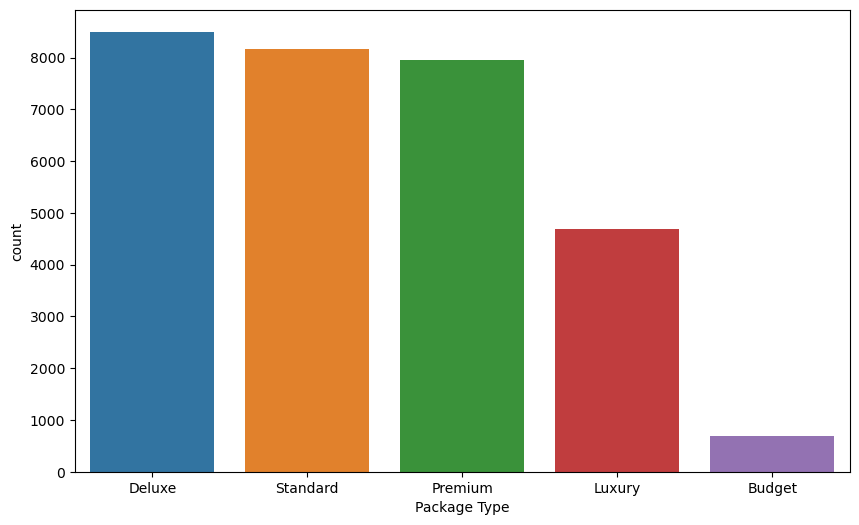

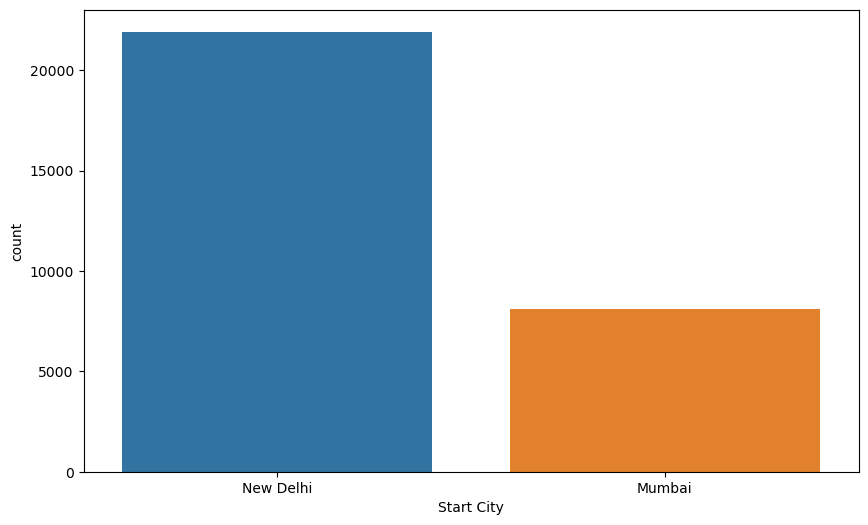

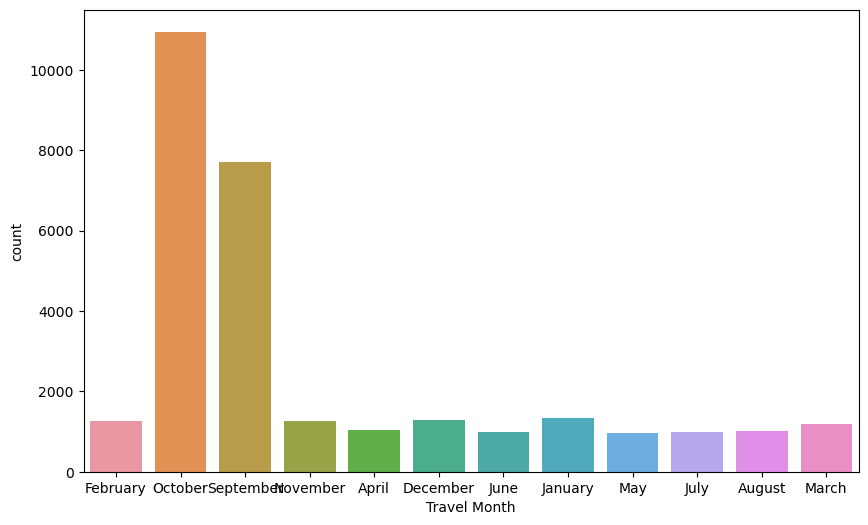

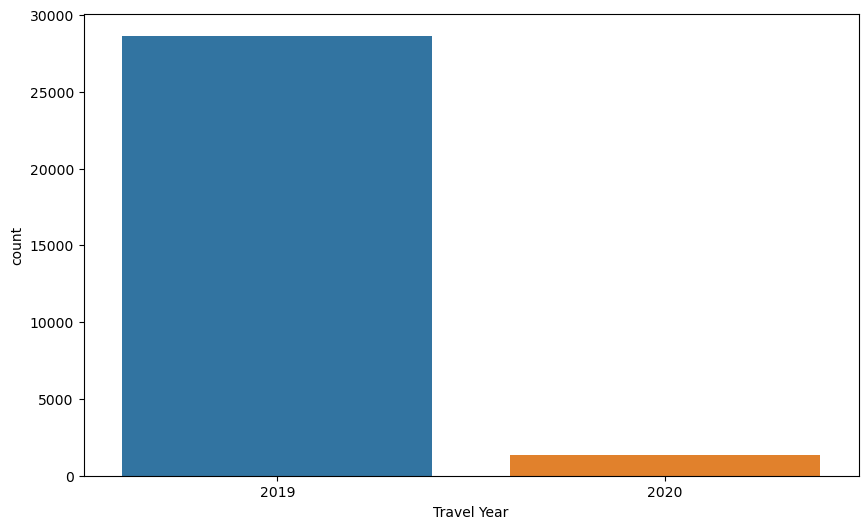

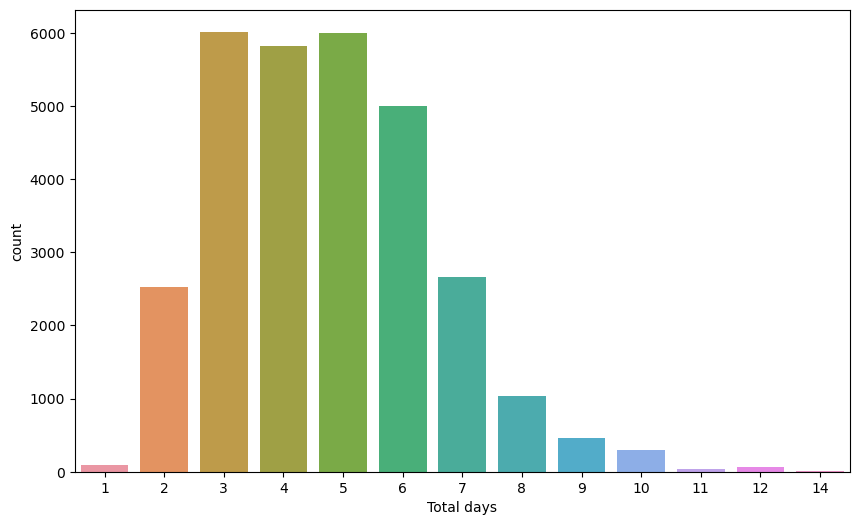

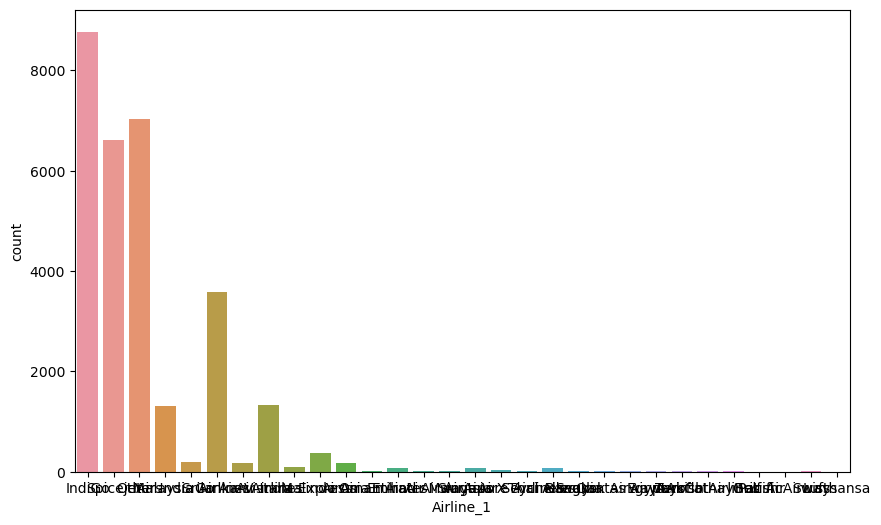

In [67]:
for i in new_df.columns:
    if len(list(new_df[i].unique()))<=30:
      sns.countplot(data = new_df, x = new_df[i] )
      plt.show()

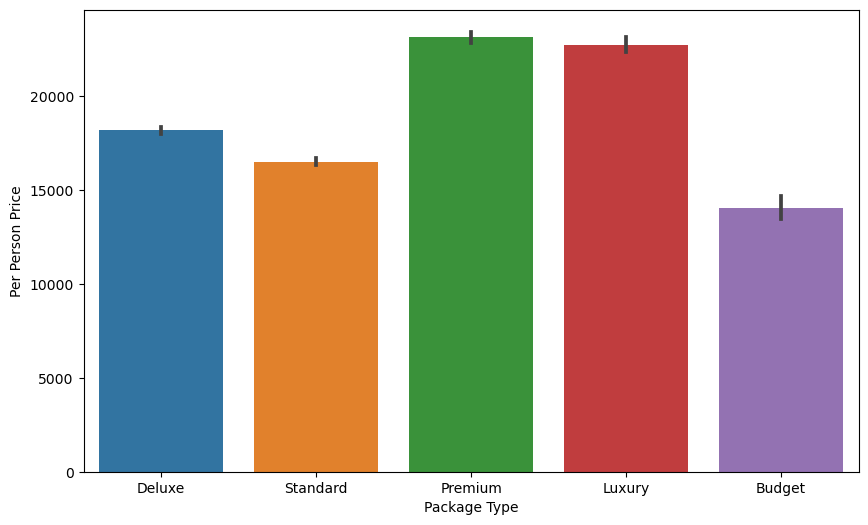

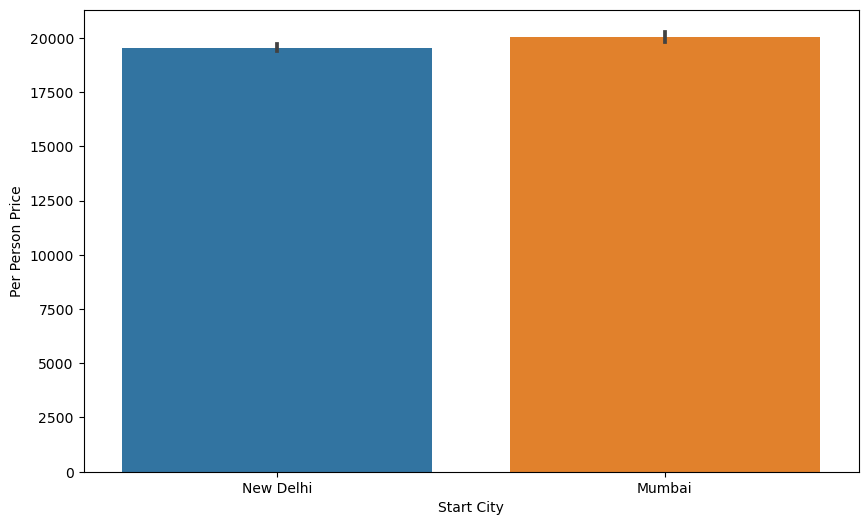

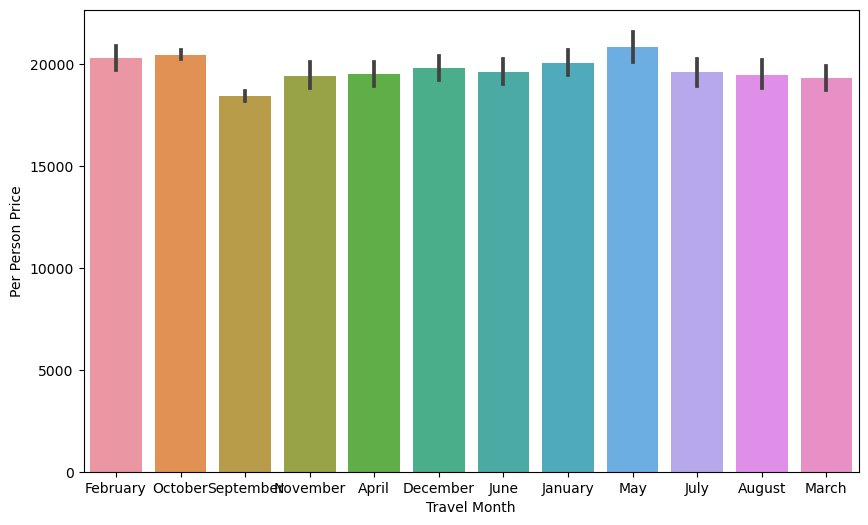

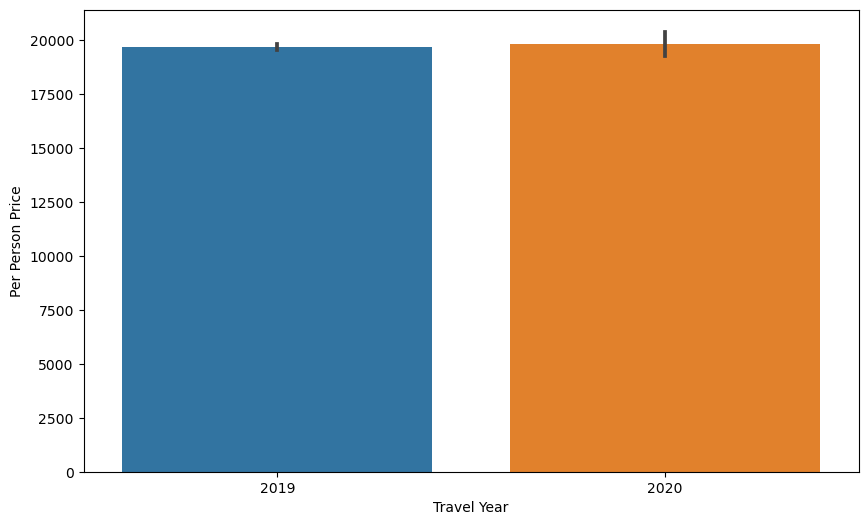

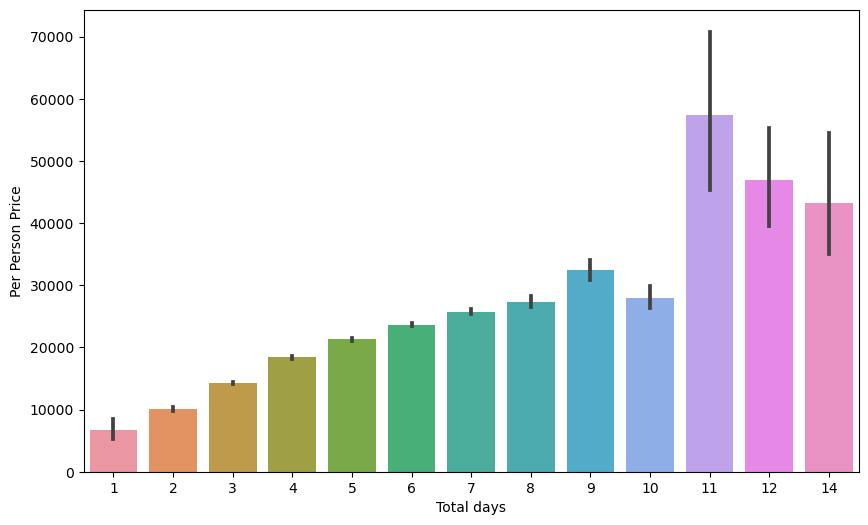

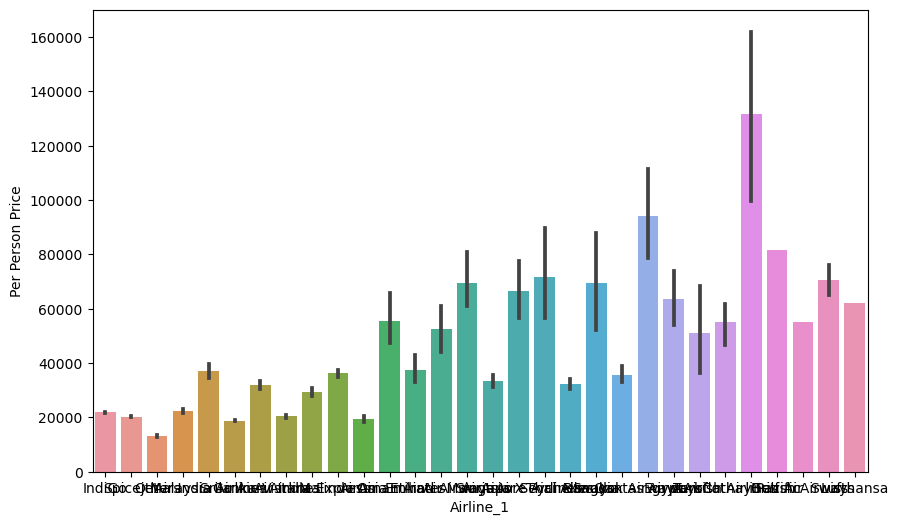

In [68]:
for i in new_df.columns:
    if len(list(new_df[i].unique()))<=30:
      sns.barplot(data = new_df, x = new_df[i], y='Per Person Price' )
      plt.show()

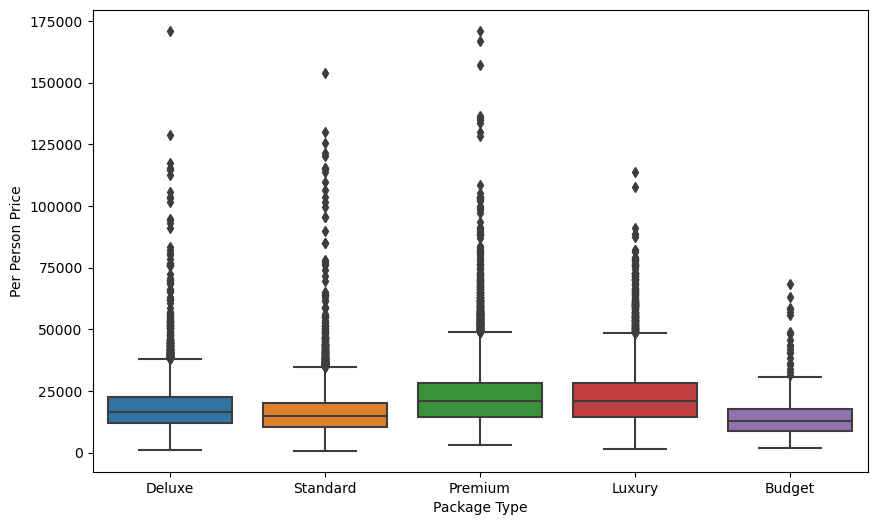

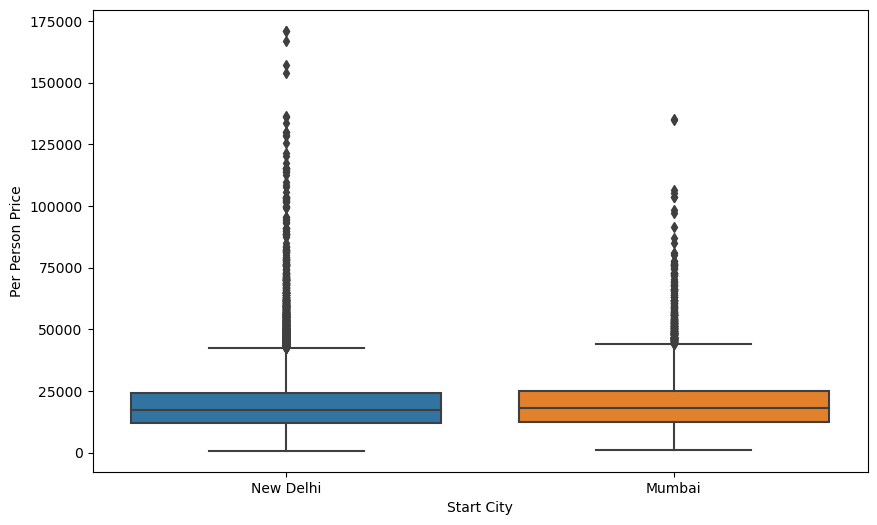

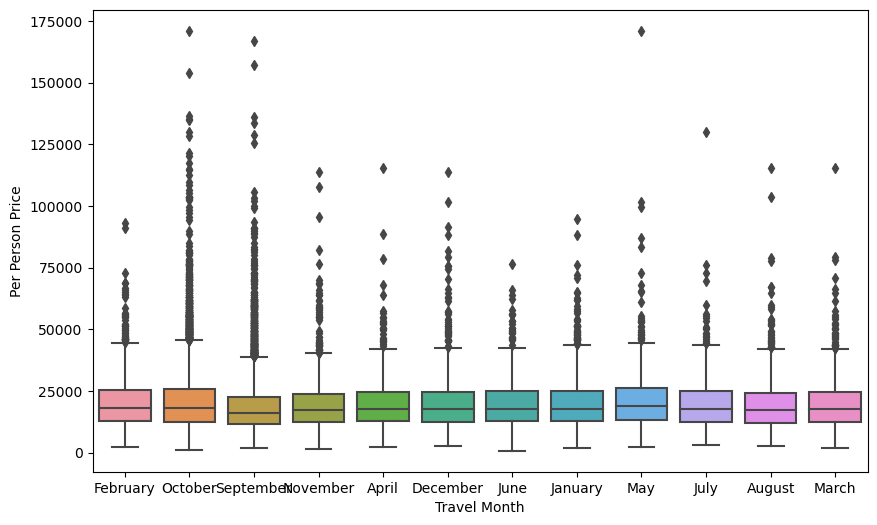

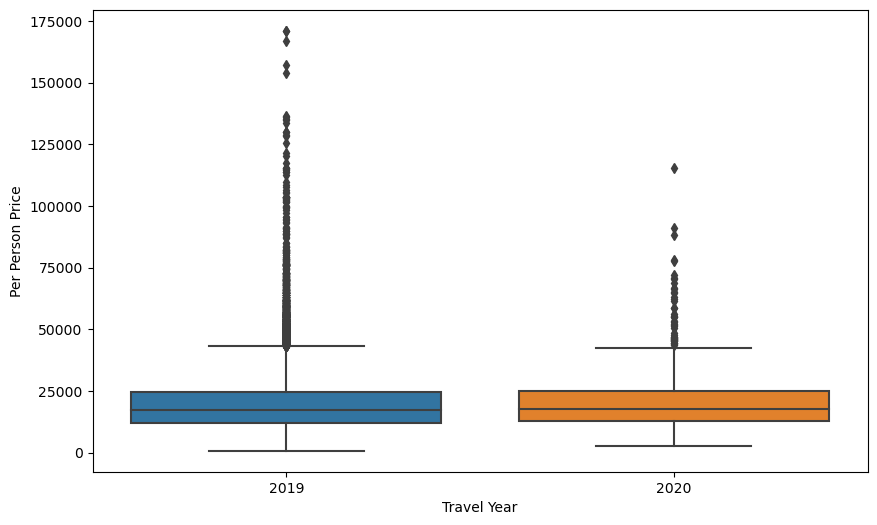

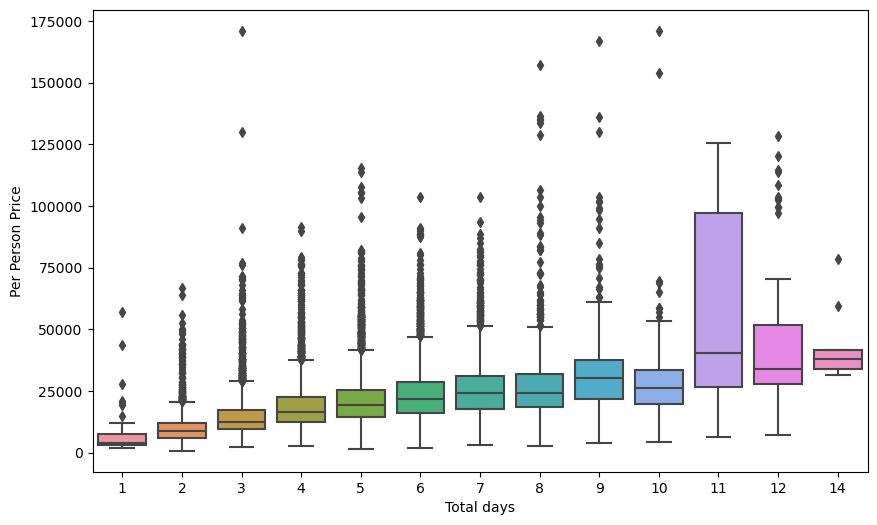

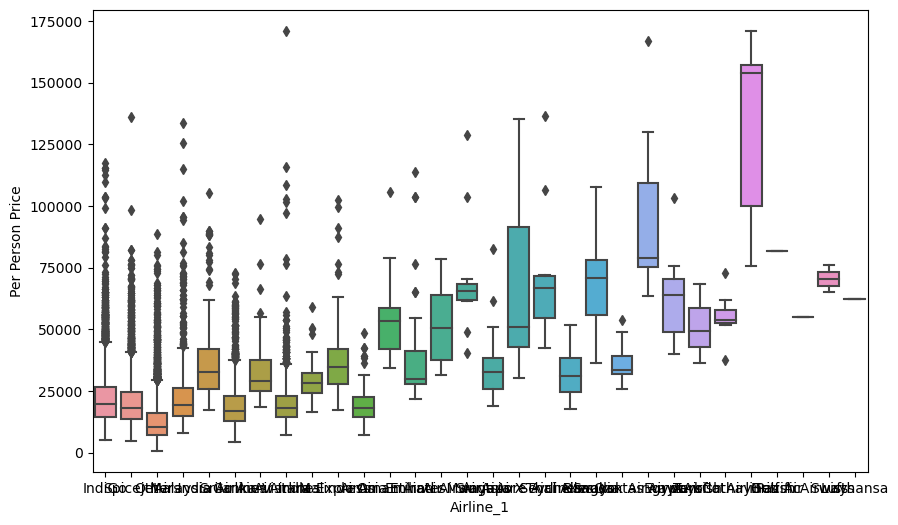

In [69]:
for i in new_df.columns:
    if len(list(new_df[i].unique()))<=30:
      sns.boxplot(data = new_df, x = new_df[i], y='Per Person Price' )
      plt.show()

In [70]:
new_df.describe(include='object')

,Package Name,Package Type,Start City,Travel Month,Travel Year,Destination_1,Destination_2,Destination_3,Airline_1,Hotel_1,Hotel_2,Hotel_3,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2230,5,2,12,2,117,133,99,30,1618,1512,1167,403,394,384,381,348,324,312,282
top,Amazing Kerala,Deluxe,New Delhi,October,2019,Shimla,Unknown,Unknown,IndiGo,Others,Unknown,Unknown,Others,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
freq,50,8500,21917,10953,28645,2267,7667,15301,8775,4167,10416,16959,2316,4180,5736,7523,9125,11035,12885,15297


In [71]:
df_final=pd.get_dummies(new_df)

In [72]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 9757 entries, Per Person Price to Site_8_Unknown
dtypes: float64(1), int32(1), uint8(9755)
memory usage: 279.4 MB


In [73]:
df_final.head(5)

,Per Person Price,Total days,Package Name_02 Night Singapore and 02 Night Genting Dream Cruise,Package Name_2 Nights Dubai and 2 Nights Sharjah Holiday,Package Name_2 Nights Moscow & 2 Nights Saint Petersburg,Package Name_2 Nights each in Jodhpur & Jaisalmer,Package Name_2 Nights in Munnar with Thekkady and Cochin,Package Name_2 nights in Kumarakom,"Package Name_3 Jewels of Rajasthan - Jaipur, Jaisalmer, Jodhpur",Package Name_3 Jewels of Rajasthan - Value Added Holiday,...,Site_8_ Viharamahadevi Park,Site_8_ Vivekananda Rock Memorial,Site_8_ War Memorial,Site_8_ Watersports at Tanjung Benoa Beach with Shared Transfers,Site_8_ Yala National Park,Site_8_ Yumthang Valley,Site_8_ Zip Lining at Mehrangarh Fort - MMT,Site_8_ Zoological Park,Site_8_ bandipur National park,Site_8_Unknown
0,35675.0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16432.0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6022.5,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,15966.5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17862.5,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data1 = df_final.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = new_df.select_dtypes(exclude='object')

for i in features1:
    Q1 = data1[i].quantile(0.25)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    data1 = data1[data1[i] <= (Q3+(1.5*IQR))]
    data1 = data1[data1[i] >= (Q1-(1.5*IQR))]
    data1 = data1.reset_index(drop=True)
display(data1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df_final.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(data1.shape[0]))

,Per Person Price,Total days,Package Name_02 Night Singapore and 02 Night Genting Dream Cruise,Package Name_2 Nights Dubai and 2 Nights Sharjah Holiday,Package Name_2 Nights Moscow & 2 Nights Saint Petersburg,Package Name_2 Nights each in Jodhpur & Jaisalmer,Package Name_2 Nights in Munnar with Thekkady and Cochin,Package Name_2 nights in Kumarakom,"Package Name_3 Jewels of Rajasthan - Jaipur, Jaisalmer, Jodhpur",Package Name_3 Jewels of Rajasthan - Value Added Holiday,...,Site_8_ Viharamahadevi Park,Site_8_ Vivekananda Rock Memorial,Site_8_ War Memorial,Site_8_ Watersports at Tanjung Benoa Beach with Shared Transfers,Site_8_ Yala National Park,Site_8_ Yumthang Valley,Site_8_ Zip Lining at Mehrangarh Fort - MMT,Site_8_ Zoological Park,Site_8_ bandipur National park,Site_8_Unknown
0,35675.0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16432.0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6022.5,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,15966.5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17862.5,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 30000 samples.
After removal of outliers, The dataset now has 28849 samples.


In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28849 entries, 0 to 28848
Columns: 9757 entries, Per Person Price to Site_8_Unknown
dtypes: float64(1), int32(1), uint8(9755)
memory usage: 268.7 MB


In [76]:
X = data1.drop('Per Person Price',axis=1)
Y = data1.loc[:,'Per Person Price']

In [77]:
X.shape,Y.shape

((28849, 9756), (28849,))

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

In [79]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((20194, 9756), (8655, 9756), (20194,), (8655,))

In [80]:
#Check for mising values
X_train.isna().sum()

Total days                                                           0
Package Name_02 Night Singapore and 02 Night Genting Dream Cruise    0
Package Name_2 Nights Dubai and 2 Nights Sharjah Holiday             0
Package Name_2 Nights Moscow & 2 Nights Saint Petersburg             0
Package Name_2 Nights each in Jodhpur & Jaisalmer                    0
                                                                    ..
Site_8_ Yumthang Valley                                              0
Site_8_ Zip Lining at Mehrangarh Fort - MMT                          0
Site_8_ Zoological Park                                              0
Site_8_ bandipur National park                                       0
Site_8_Unknown                                                       0
Length: 9756, dtype: int64

In [81]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(X_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,Total days,Package Name_02 Night Singapore and 02 Night Genting Dream Cruise,Package Name_2 Nights Dubai and 2 Nights Sharjah Holiday,Package Name_2 Nights Moscow & 2 Nights Saint Petersburg,Package Name_2 Nights each in Jodhpur & Jaisalmer,Package Name_2 Nights in Munnar with Thekkady and Cochin,Package Name_2 nights in Kumarakom,"Package Name_3 Jewels of Rajasthan - Jaipur, Jaisalmer, Jodhpur",Package Name_3 Jewels of Rajasthan - Value Added Holiday,Package Name_3 Nights Abu Dhabi and 2 Nights Dubai Holiday,...,Site_8_ Viharamahadevi Park,Site_8_ Vivekananda Rock Memorial,Site_8_ War Memorial,Site_8_ Watersports at Tanjung Benoa Beach with Shared Transfers,Site_8_ Yala National Park,Site_8_ Yumthang Valley,Site_8_ Zip Lining at Mehrangarh Fort - MMT,Site_8_ Zoological Park,Site_8_ bandipur National park,Site_8_Unknown
count,2.019400e+04,20194.0,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,...,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04,2.019400e+04
mean,-5.018929e-16,0.0,7.896732e-16,-1.647472e-15,-1.345885e-15,-4.928388e-17,-2.139464e-16,-1.376821e-16,-2.614153e-16,-1.141831e-15,...,6.937732e-16,8.645163e-16,-2.332986e-16,1.538967e-15,-1.989919e-15,-1.655981e-16,2.304919e-15,6.767775e-16,-2.363593e-15,-7.936495e-16
std,1.000025e+00,0.0,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.109326e+00,0.0,-2.334552e-02,-1.723967e-02,-1.723967e-02,-2.225852e-02,-2.111577e-02,-1.862143e-02,-1.990764e-02,-7.037195e-03,...,-3.520690e-02,-2.986886e-02,-2.111577e-02,-1.218938e-02,-1.990764e-02,-3.449472e-02,-1.862143e-02,-5.939950e-02,-1.990764e-02,-1.020008e+00
25%,-9.537958e-01,0.0,-2.334552e-02,-1.723967e-02,-1.723967e-02,-2.225852e-02,-2.111577e-02,-1.862143e-02,-1.990764e-02,-7.037195e-03,...,-3.520690e-02,-2.986886e-02,-2.111577e-02,-1.218938e-02,-1.990764e-02,-3.449472e-02,-1.862143e-02,-5.939950e-02,-1.990764e-02,-1.020008e+00
50%,2.017342e-01,0.0,-2.334552e-02,-1.723967e-02,-1.723967e-02,-2.225852e-02,-2.111577e-02,-1.862143e-02,-1.990764e-02,-7.037195e-03,...,-3.520690e-02,-2.986886e-02,-2.111577e-02,-1.218938e-02,-1.990764e-02,-3.449472e-02,-1.862143e-02,-5.939950e-02,-1.990764e-02,9.803845e-01
75%,7.794993e-01,0.0,-2.334552e-02,-1.723967e-02,-1.723967e-02,-2.225852e-02,-2.111577e-02,-1.862143e-02,-1.990764e-02,-7.037195e-03,...,-3.520690e-02,-2.986886e-02,-2.111577e-02,-1.218938e-02,-1.990764e-02,-3.449472e-02,-1.862143e-02,-5.939950e-02,-1.990764e-02,9.803845e-01
max,3.090559e+00,0.0,4.283478e+01,5.800575e+01,5.800575e+01,4.492661e+01,4.735797e+01,5.370156e+01,5.023196e+01,1.421021e+02,...,2.840352e+01,3.347968e+01,4.735797e+01,8.203861e+01,5.023196e+01,2.898994e+01,5.370156e+01,1.683516e+01,5.023196e+01,9.803845e-01



                                Standardardization on Testing set                                


,Total days,Package Name_02 Night Singapore and 02 Night Genting Dream Cruise,Package Name_2 Nights Dubai and 2 Nights Sharjah Holiday,Package Name_2 Nights Moscow & 2 Nights Saint Petersburg,Package Name_2 Nights each in Jodhpur & Jaisalmer,Package Name_2 Nights in Munnar with Thekkady and Cochin,Package Name_2 nights in Kumarakom,"Package Name_3 Jewels of Rajasthan - Jaipur, Jaisalmer, Jodhpur",Package Name_3 Jewels of Rajasthan - Value Added Holiday,Package Name_3 Nights Abu Dhabi and 2 Nights Dubai Holiday,...,Site_8_ Viharamahadevi Park,Site_8_ Vivekananda Rock Memorial,Site_8_ War Memorial,Site_8_ Watersports at Tanjung Benoa Beach with Shared Transfers,Site_8_ Yala National Park,Site_8_ Yumthang Valley,Site_8_ Zip Lining at Mehrangarh Fort - MMT,Site_8_ Zoological Park,Site_8_ bandipur National park,Site_8_Unknown
count,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8.655000e+03,...,8655.000000,8655.000000,8655.000000,8.655000e+03,8655.000000,8655.000000,8.655000e+03,8655.000000,8655.000000,8655.000000
mean,0.003805,0.000116,-0.013442,-0.010536,0.009576,0.008902,0.006255,0.006206,-0.014102,-7.037195e-03,...,0.000937,0.001105,-0.004693,-1.218938e-02,0.026541,0.012454,-1.862143e-02,-0.000840,0.009123,-0.003980
std,0.996881,0.010749,0.651463,0.623687,1.247157,1.183138,1.138512,1.154672,0.540155,9.289981e-16,...,1.013262,1.018367,0.881990,2.142507e-15,1.527172,1.166455,2.779188e-15,0.992990,1.207545,1.000129
min,-2.109326,0.000000,-0.023346,-0.017240,-0.017240,-0.022259,-0.021116,-0.018621,-0.019908,-7.037195e-03,...,-0.035207,-0.029869,-0.021116,-1.218938e-02,-0.019908,-0.034495,-1.862143e-02,-0.059400,-0.019908,-1.020008
25%,-0.953796,0.000000,-0.023346,-0.017240,-0.017240,-0.022259,-0.021116,-0.018621,-0.019908,-7.037195e-03,...,-0.035207,-0.029869,-0.021116,-1.218938e-02,-0.019908,-0.034495,-1.862143e-02,-0.059400,-0.019908,-1.020008
50%,0.201734,0.000000,-0.023346,-0.017240,-0.017240,-0.022259,-0.021116,-0.018621,-0.019908,-7.037195e-03,...,-0.035207,-0.029869,-0.021116,-1.218938e-02,-0.019908,-0.034495,-1.862143e-02,-0.059400,-0.019908,0.980384
75%,0.779499,0.000000,-0.023346,-0.017240,-0.017240,-0.022259,-0.021116,-0.018621,-0.019908,-7.037195e-03,...,-0.035207,-0.029869,-0.021116,-1.218938e-02,-0.019908,-0.034495,-1.862143e-02,-0.059400,-0.019908,0.980384
max,3.090559,1.000000,42.834778,58.005747,58.005747,44.926607,47.357975,53.701556,50.231962,-7.037195e-03,...,28.403521,33.479679,47.357975,-1.218938e-02,50.231962,28.989941,-1.862143e-02,16.835158,50.231962,0.980384


In [82]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 10)
  
X_train1 = pca.fit_transform(Train_X_std)
X_test1 = pca.transform(Test_X_std)
  
explained_variance = pca.explained_variance_ratio_

In [83]:
def evaluate_models(models,X_train, Y_train,X_test, Y_test):
    """
    Fits each model to the training data and evaluates its performance on the testing data.
    Returns a DataFrame of the performance metrics (MAE, MSE, R-squared) for each model,
    as well as plots of the actual vs predicted fares for each model.
    
    Parameters:
    models (dict): A dictionary of model objects, where the keys are model names and the values are model objects.
    X_train (pd.DataFrame): The training feature data.
    y_train (pd.Series): The training target data.
    X_test (pd.DataFrame): The testing feature data.
    y_test (pd.Series): The testing target data.
    
    Returns:
    results (pd.DataFrame): A DataFrame of the performance metrics (MAE, MSE, R-squared) for each model.
    """
    results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R-squared'])

    for name, model in models.items():
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test,y_pred)
        mae = mean_absolute_error(Y_test,y_pred)
        r2 = r2_score(Y_test, y_pred)

        results = results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R-squared': r2}, ignore_index=True)

        # Plot actual vs predicted fares
        plt.figure(figsize=(8, 6))
        ax = sns.scatterplot(x=Y_test.values, y=y_pred, alpha=0.5)
        ax.set_xlabel('Actual Per Person Price')
        ax.set_ylabel('Predicted Per Person Price')
        ax.set_title(f'{name} Predictions')
        plt.show()
    print(f"{name}:\nMAE = {mae:.2f}\nMSE = {mse:.2f}\nR-squared = {r2:.2f}\n\n")

    return results


In [84]:
from sklearn.linear_model import SGDRegressor

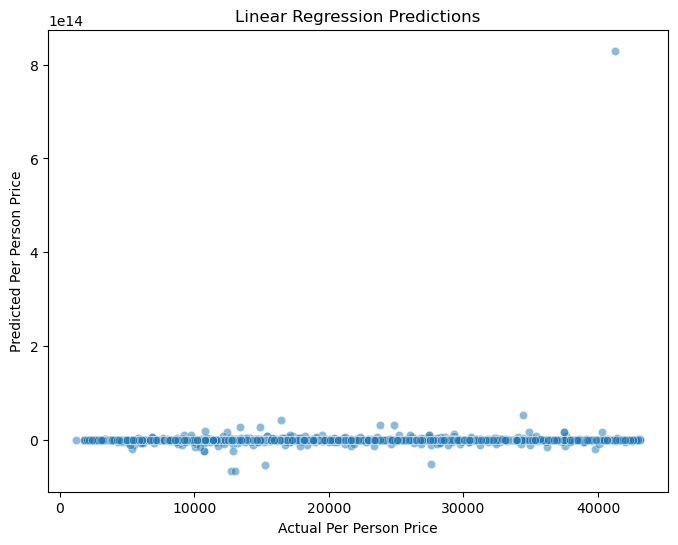

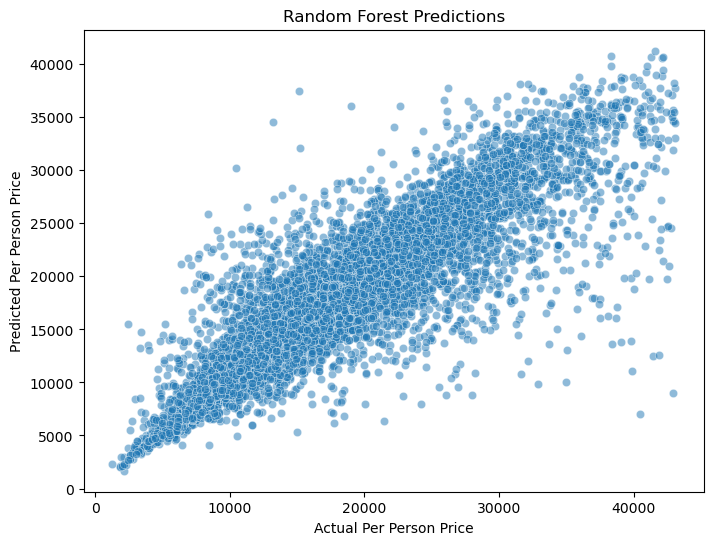

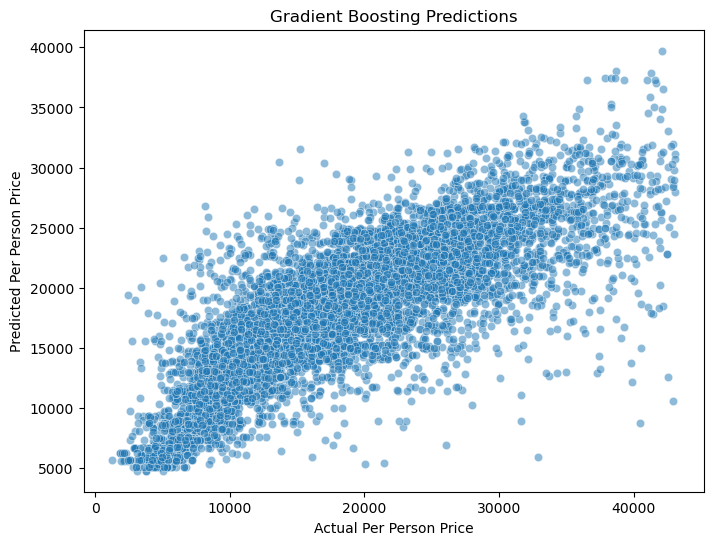

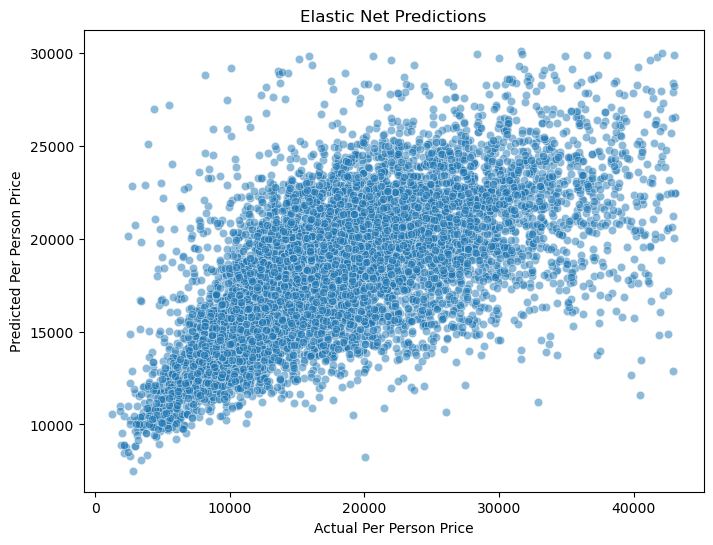

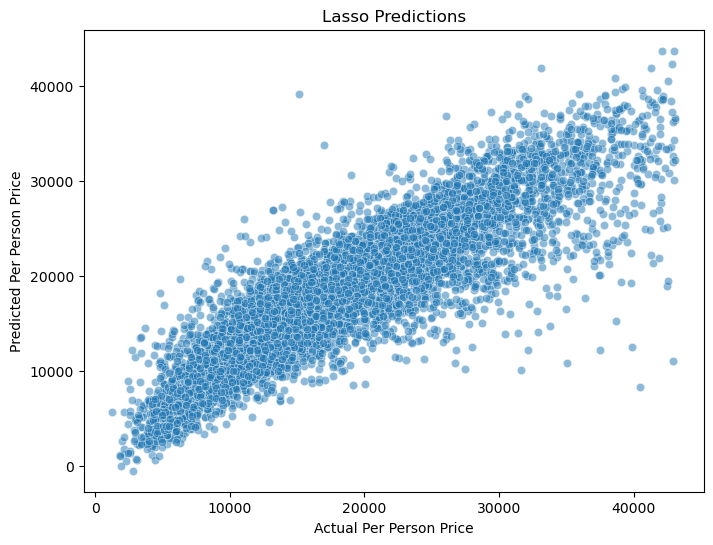

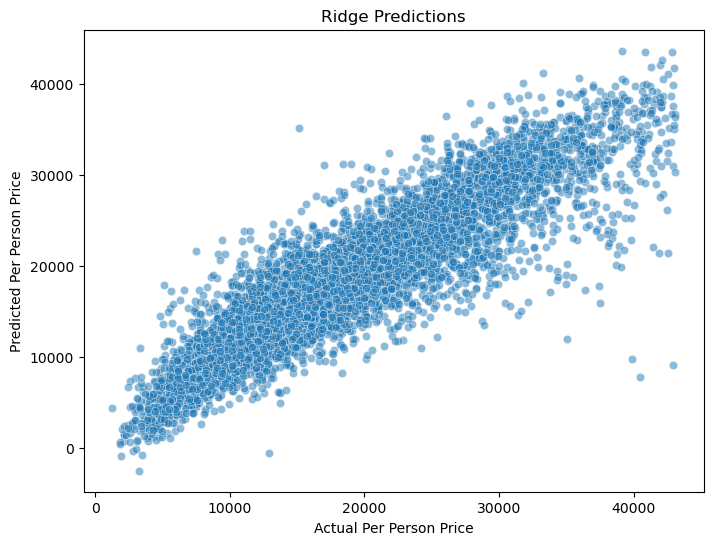

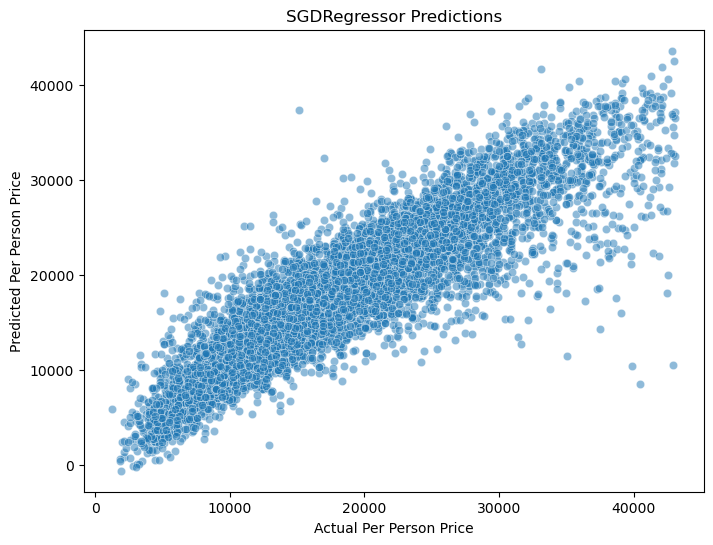

SGDRegressor:
MAE = 2608.88
MSE = 13545933.95
R-squared = 0.80


               Model           MAE           MSE     R-squared
0  Linear Regression  3.211803e+11  8.351876e+25 -1.208873e+18
1      Random Forest  2.539067e+03  1.579148e+07  7.714299e-01
2  Gradient Boosting  3.880729e+03  2.671596e+07  6.133060e-01
3        Elastic Net  5.117149e+03  4.171276e+07  3.962383e-01
4              Lasso  2.799228e+03  1.533155e+07  7.780870e-01
5              Ridge  2.511838e+03  1.251944e+07  8.187903e-01
6       SGDRegressor  2.608881e+03  1.354593e+07  8.039325e-01


In [85]:
models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boosting': GradientBoostingRegressor(),
          'Elastic Net': ElasticNet(),
         'Lasso':Lasso(),
         'Ridge':Ridge(),
         'SGDRegressor':SGDRegressor()}

results = evaluate_models(models,X_train, Y_train,X_test, Y_test)
print(results)

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=7)

cross_val_score(Ridge(), X, Y, cv=cv)

array([0.81879026, 0.8272373 , 0.82397876, 0.8185778 , 0.81996227])

In [89]:
#with pca
model1=Ridge()
model1.fit(X_train1, Y_train)
y_pred1 = model1.predict(X_test1)
mse1 = mean_squared_error(Y_test,y_pred1)
mae1 = mean_absolute_error(Y_test,y_pred1)
r21 = r2_score(Y_test, y_pred1)

In [91]:
print("MSE:",mse1,"MAE:",mae1,"R2:",r21)

MSE: 57818072.80533935 MAE: 6067.380377955329 R2: 0.1631257662856629


In [92]:
#without pca
model=Ridge()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)

In [93]:
print("MSE:",mse,"MAE:",mae,"R2:",r2)

MSE: 12519441.674244635 MAE: 2511.8381416322536 R2: 0.8187902562415177


,Total days,Package Name_02 Night Singapore and 02 Night Genting Dream Cruise,Package Name_2 Nights Dubai and 2 Nights Sharjah Holiday,Package Name_2 Nights Moscow & 2 Nights Saint Petersburg,Package Name_2 Nights each in Jodhpur & Jaisalmer,Package Name_2 Nights in Munnar with Thekkady and Cochin,Package Name_2 nights in Kumarakom,"Package Name_3 Jewels of Rajasthan - Jaipur, Jaisalmer, Jodhpur",Package Name_3 Jewels of Rajasthan - Value Added Holiday,Package Name_3 Nights Abu Dhabi and 2 Nights Dubai Holiday,...,Site_8_ Viharamahadevi Park,Site_8_ Vivekananda Rock Memorial,Site_8_ War Memorial,Site_8_ Watersports at Tanjung Benoa Beach with Shared Transfers,Site_8_ Yala National Park,Site_8_ Yumthang Valley,Site_8_ Zip Lining at Mehrangarh Fort - MMT,Site_8_ Zoological Park,Site_8_ bandipur National park,Site_8_Unknown
27676,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13424,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4105,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
120,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17989,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14848,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28541,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18811,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5761,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
y_t=pd.DataFrame(Y_test, columns = ['Per Person Price'])

In [135]:
y_t=y_t.reset_index()

In [136]:
y_df = pd.DataFrame(y_pred, columns = ['Predicted Price'])

In [137]:
c=[y_df,y_t]

In [143]:
predictions=pd.concat(c,axis=1)

In [146]:
predictions.loc[:,['Per Person Price',"Predicted Price"]].head(20)

,Per Person Price,Predicted Price
0,9086.5,21284.245528
1,17548.0,21848.887531
2,33766.0,17159.609837
3,11947.0,14805.537585
4,12290.5,10173.698293
5,7085.5,5406.160551
6,11085.5,10738.053421
7,11998.0,12428.021222
8,16032.5,17081.995919
9,24913.0,25604.902909
